In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('gold_price_forecasting_dataset.csv')
print(dataset.head())

         date    adj close        close         high          low  \
0  2021-06-11  1877.400024  1877.400024  1902.300049  1875.199951   
1  2021-06-14  1864.000000  1864.000000  1866.599976  1846.500000   
2  2021-06-15  1854.500000  1854.500000  1867.199951  1854.400024   
3  2021-06-16  1859.500000  1859.500000  1860.099976  1809.199951   
4  2021-06-17  1773.800049  1773.800049  1823.300049  1769.599976   

          open  volume         ma_7        ma_30        ma_90  daily_return  \
0  1900.900024     349  1887.828561  1860.180005  1790.618891     -0.008869   
1  1866.199951      41  1886.799997  1863.403337  1790.972225     -0.007138   
2  1866.400024      78  1881.757132  1865.506669  1791.701114     -0.005097   
3  1859.400024     117  1876.428554  1868.296667  1792.241113      0.002696   
4  1811.800049    1135  1859.514282  1867.953337  1791.595558     -0.046088   

   volatility_7  volatility_30        rsi       macd  macd_signal  \
0      0.009353       0.007538  54.722931

In [6]:
x = dataset[['ma_30']].values
y = dataset['adj close'].values

print(y)


[1877.40002441 1864.         1854.5        ... 5301.60009766 5318.39990234
 4713.89990234]


another method for train and test splitting

In [10]:
split_index = int(len(x) * 0.8)
x_train = x[:split_index]
x_test = x[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_poly, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(x_test_poly)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test ,  y_pred)
r2 = r2_score(y_test , y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 15143.273407762974
R^2 Score: 0.9464491413661089


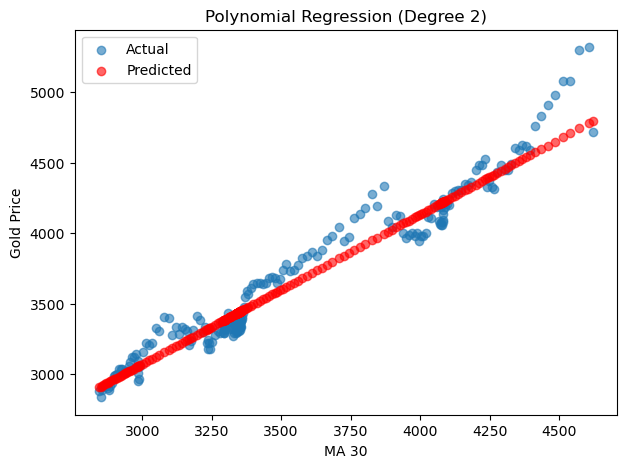

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(x_test, y_test, label="Actual", alpha=0.6)
plt.scatter(x_test, y_pred, label="Predicted", color="red", alpha=0.6)
plt.xlabel("MA 30")
plt.ylabel("Gold Price")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()